In [ ]:
!pip3 install agentpy ipython seaborn

In [164]:
import agentpy as ap, numpy as np
from enum import Enum
from matplotlib import pyplot as plt
from IPython.display import HTML
from queue import PriorityQueue
import seaborn as sns
import json
from io import BytesIO
import base64
import os

In [161]:
# Set up enum and plot func

class AgentType(Enum):
    """Enum for each type of agent"""
    RANDOM = "random",
    LARGEST = "largest_reward",
    CLOSEST = "closest_reward"

def my_plot(model, ax):
    """Function for plotting"""
    grid = np.zeros(model.environment.shape)
    print(model.environment.positions)
    for agent, pos in model.environment.positions.items():
        grid[pos] = agent.id
    ax.imshow(grid, cmap='Greys')
    ax.set_title(f"Energy Level: {model.energy} \nRewards: {model.rewards}", fontsize=14)


In [289]:
# Model class to test interactions
class SimpleModel(ap.Model):

    def __init__(self, steps: int, type: AgentType, energy: int, initial_position: float, grid):
        """Initial values (could also use setup method)"""
        parameters = {'steps':steps}
        super().__init__(parameters=parameters)
        self.grid = grid
        self.environment = ap.Grid(self, (len(self.grid), len(self.grid[0])))
        self.agent = ap.Agent(self)
        self.environment.add_agents([self.agent], positions=[initial_position])
        self.type = type
        self.target = None
        self.energy = energy
        self.rewards = 0
        self.setup_rewards()

    def step(self):
        """According to agent type each step function is called"""
        if self.energy <= 0:
            print("No energy")
            self.stop()
            return
        
        if self.type is AgentType.RANDOM:
            self.step_random()
        elif self.type is AgentType.LARGEST:
            self.step_largest()
        elif self.type is AgentType.CLOSEST:
            self.step_closest()
        
        # self.energy -= 1

    def setup_rewards(self):
        """Add additional data structures according to the agent"""
        if self.type is AgentType.RANDOM:
            self.moves = [(0,1), (0,-1), (1,0), (-1,0)]

        elif self.type is AgentType.LARGEST:
            self.pq = PriorityQueue()
            
            for i in range(len(self.grid)): 
                for j in range(len(self.grid[i])):  
                    value = self.grid[i][j]
                    
                    if value != 0:  
                        self.pq.put((-1*value, (i, j))) 
        
        elif self.type is AgentType.CLOSEST:
           self.rewards_list = []

           for i in range(len(self.grid)): 
                for j in range(len(self.grid[i])):  
                    value = self.grid[i][j]
                    
                    if value != 0:  
                        self.rewards_list.append((value, (i,j)))

    def move(self) -> None:
        """Movement either vertically or horizontally according to target"""
        move = (0,0)
  
        if self.target[0] > self.current_position[0]:
            move = (1,0)
        elif self.target[0] < self.current_position[0]:
            move = (-1,0)
        elif self.target[1] > self.current_position[1]:
            move = (0,1)
        elif self.target[1] < self.current_position[1]:
            move = (0,-1)
        
        if move != (0,0):
            self.energy -= 1
            
        self.environment.move_by(self.agent, move)
    
    def add_value(self):
        """Check if reward exists in curr position and add it to energy"""
        if self.grid[self.current_position[0]][self.current_position[1]] != 0:
            self.energy += self.grid[self.current_position[0]][self.current_position[1]] 
            self.grid[self.current_position[0]][self.current_position[1]] = 0
            self.rewards += 1

    def step_random(self):
        """Step for random movement"""
        initial = self.environment.positions[self.agent]
        move = self.moves[np.random.randint(0,4)]
        self.environment.move_by(self.agent, move)
        self.current_position = self.environment.positions[self.agent]
        self.add_value()
        if initial != self.current_position:
            self.energy -= 1
    
    def step_largest(self):
        """Step for going to the largest avaliable reward"""
        self.current_position = self.environment.positions[self.agent]

        if self.target is None or self.target == self.current_position:
            self.add_value()
            
            if not self.pq.empty():
                _, self.target = self.pq.get()
            else:
                _, self.target = 0, self.current_position
                
        self.move()
    
    def step_closest(self):
        """Step for going to closest available reward"""
        self.current_position = self.environment.positions[self.agent] 
        
        if self.target is None or self.target == self.current_position:
            self.add_value()

            closest_reward = (np.inf, self.current_position)
            r = None

            for reward in self.rewards_list:
                value, position = reward

                distance = abs(position[0] - float(self.current_position[0])) + abs(position[1] - float(self.current_position[1]))

                if distance < closest_reward[0]:
                    closest_reward = (distance, position)
                    r = reward

            if r is not None:
                self.target = closest_reward[1]
                self.rewards_list.remove(r)
            else:
                _, self.target = 0, self.current_position

        self.move()



money: 5
step cost: 1
position: [9, 0]
{Agent (Obj 2): (9, 0)}
{Agent (Obj 2): (9, 0)}
{Agent (Obj 2): (8, 0)}
{Agent (Obj 2): (7, 0)}
{Agent (Obj 2): (6, 0)}
{Agent (Obj 2): (5, 0)}
{Agent (Obj 2): (4, 0)}
{Agent (Obj 2): (3, 0)}
{Agent (Obj 2): (2, 0)}
{Agent (Obj 2): (1, 0)}
{Agent (Obj 2): (0, 0)}
{Agent (Obj 2): (0, 1)}
{Agent (Obj 2): (0, 2)}
{Agent (Obj 2): (1, 2)}
{Agent (Obj 2): (1, 3)}
{Agent (Obj 2): (1, 4)}
{Agent (Obj 2): (1, 5)}
{Agent (Obj 2): (1, 6)}
{Agent (Obj 2): (1, 7)}
{Agent (Obj 2): (2, 7)}
{Agent (Obj 2): (3, 7)}
{Agent (Obj 2): (4, 7)}
{Agent (Obj 2): (4, 6)}
{Agent (Obj 2): (4, 5)}
{Agent (Obj 2): (4, 4)}
{Agent (Obj 2): (4, 3)}
{Agent (Obj 2): (5, 3)}
{Agent (Obj 2): (5, 4)}
{Agent (Obj 2): (5, 5)}
{Agent (Obj 2): (5, 6)}
{Agent (Obj 2): (5, 7)}
{Agent (Obj 2): (4, 7)}
{Agent (Obj 2): (3, 7)}
{Agent (Obj 2): (2, 7)}
{Agent (Obj 2): (1, 7)}
{Agent (Obj 2): (1, 6)}
{Agent (Obj 2): (1, 5)}
{Agent (Obj 2): (1, 4)}
{Agent (Obj 2): (1, 3)}
{Agent (Obj 2): (1, 4)}
{


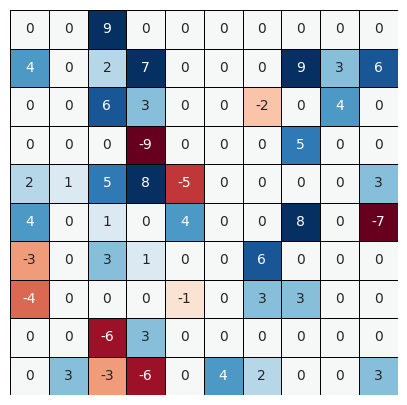

In [294]:
# Example (change agent behaviour in the following constant)
AGENT = AgentType.LARGEST

# Load json example
f = open('assets/params_10_10__1.json')
parameters = json.load(f)
state, money, step_cost, position = [parameters[key] for key in ['state', 'money', 'step_cost', 'position']]
h, w = np.array(state).shape
plt.rcParams['figure.figsize'] = [w // 2, h // 2]

# Static plot
print(f'money: {money}')
print(f'step cost: {step_cost}')
print(f'position: {position}')

# Heatmap
fig_static, ax_static = plt.subplots()
sns.heatmap(state, linewidth=0.5, linecolor='black', annot=True, cmap='RdBu', cbar=False, vmin=-7, vmax=7, ax=ax_static)
ax_static.set_xticks([])
ax_static.set_yticks([])

# Save heatmap as a PNG
buf = BytesIO()
fig_static.savefig(buf, format="png", bbox_inches="tight")
buf.seek(0)
static_img_html = f"<img src='data:image/png;base64,{base64.b64encode(buf.read()).decode()}' style='width:100%;'/>"
buf.close()
plt.close(fig_static)

# Animation 
fig, ax = plt.subplots()
simpleModel = SimpleModel(100, AGENT, 15, position, state)
animation = ap.animate(simpleModel, fig, ax, my_plot)
animation_html = animation.to_jshtml()

# Display side by side
display(HTML(f"""
<div style="display: flex; flex-direction: row; align-items: flex-start; gap: 20px;">
    <div style="flex: 1;">{static_img_html}</div>
    <div style="flex: 2;">{animation_html}</div>
</div>
"""))

Completed: 32 stepsNo energy
Completed: 33 steps
Run time: 0:00:00.002587
Simulation finished
Completed: 100 steps
Run time: 0:00:00.002240
Simulation finished
Completed: 100 steps
Run time: 0:00:00.001752
Simulation finished
Completed: 34 stepsNo energy
Completed: 35 steps
Run time: 0:00:00.001234
Simulation finished
Completed: 100 steps
Run time: 0:00:00.003790
Simulation finished
TTT (2, 3)
Completed: 3 stepsTTT (3, 3)
Completed: 4 stepsTTT (6, 4)
Completed: 8 stepsTTT (7, 4)
Completed: 9 stepsTTT (7, 3)
Completed: 10 stepsNo energy
Completed: 11 steps
Run time: 0:00:00.002019
Simulation finished
Completed: 18 stepsNo energy
Completed: 19 steps
Run time: 0:00:00.000798
Simulation finished
Completed: 100 steps
Run time: 0:00:00.001777
Simulation finished
Completed: 100 steps
Run time: 0:00:00.001489
Simulation finished
Completed: 19 stepsNo energy
Completed: 20 steps
Run time: 0:00:00.000639
Simulation finished
Completed: 31 stepsNo energy
Completed: 32 steps
Run time: 0:00:00.000914

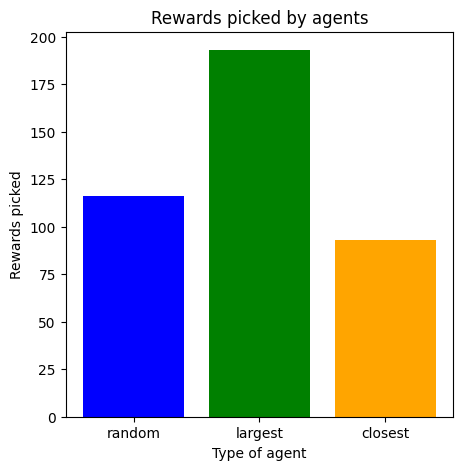

In [296]:

folder_path = 'assets/'
random_rewards = 0
closest_rewards = 0
largest_rewards = 0

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r') as f:
            parameters = json.load(f)
        
        state, money, step_cost, position = [parameters[key] for key in ['state', 'money', 'step_cost', 'position']]

        simpleModelRandom = SimpleModel(100, AgentType.RANDOM, 15, position, state)
        simpleModelRandom.run(100)
        random_rewards += simpleModelRandom.rewards

        simpleModelLargest = SimpleModel(100, AgentType.LARGEST, 15, position, state)
        simpleModelLargest.run(100)
        largest_rewards +=  simpleModelLargest.rewards

        simpleModelClosest = SimpleModel(100, AgentType.CLOSEST, 15, position, state)
        simpleModelClosest.run(100)
        closest_rewards += simpleModelClosest.rewards
        
categories = ["random", "largest", "closest"]
values = [random_rewards, largest_rewards, closest_rewards]

# Create the bar plot
plt.bar(categories, values, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel("Type of agent")
plt.ylabel("Rewards picked")
plt.title("Rewards picked by agents")

# Display the plot
plt.show()